In [1]:
# imports iniciales
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import calendar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import datetime
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
########## https://jessesw.com/XG-Boost/

In [4]:
training_labels = pd.read_csv("labels_training_set.csv", low_memory=False)
labels_predict = pd.read_csv("trocafone_kaggle_test.csv", low_memory=False)
features = pd.read_csv('data_set.csv', low_memory = False)

In [5]:
print(training_labels.shape)
training_labels = pd.merge(features, training_labels, on='person', how='inner')
print(training_labels.shape)
training_labels.head(2)

(19414, 2)
(19414, 194)


,person,Email,Organic,Paid,Referral,Social,Unknown,ad campaign hit,brand listing,checkout,...,minimo,suma_resolution,promedio_resolution,maximo_resolution,minimo_resolution,promedio de TFIdf modelo,Suma de TFidf modelo,Maximo de TFIdf modelo,Minimo de TFIdf modelo,label
0,0008ed71,0.0,0.0,0.0,2.0,0.0,0.0,0,0,3,...,20180517122747,4147200,691200.000000,2073600,0,1.617163,4.851488,1.859879,1.300103,0
1,000c79fe,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,...,20180529002747,230400,13552.941176,230400,0,1.000000,4.000000,1.000000,1.000000,0


In [6]:
print(labels_predict.shape)
labels_predict = pd.merge(features, labels_predict, on='person', how='inner')
print(labels_predict.shape)
labels_predict.head(2)

(19415, 1)
(19415, 193)


,person,Email,Organic,Paid,Referral,Social,Unknown,ad campaign hit,brand listing,checkout,...,maximo,minimo,suma_resolution,promedio_resolution,maximo_resolution,minimo_resolution,promedio de TFIdf modelo,Suma de TFidf modelo,Maximo de TFIdf modelo,Minimo de TFIdf modelo
0,00091926,0.0,0.0,8.0,1.0,0.0,0.0,15,25,2,...,20180531195203,20180503220829,26738688,59684.571429,786432,0,1.490856,557.580165,2.209395,1.0
1,00091a7a,0.0,0.0,1.0,0.0,0.0,0.0,1,5,0,...,20180326145658,20180326145111,230400,23040.000000,230400,0,1.219303,3.657909,1.357806,1.0


In [7]:
train = training_labels
target = 'label'
IDcol = 'person'

In [8]:
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [9]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'criterion' : 'entropy'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [10]:
optimized_GBM.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, criterion='entropy', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
# optimized_GBM.grid_scores_

In [12]:
## MEJOR:
## mean: 0.94736, std: 0.00081, params: {'max_depth': 5, 'min_child_weight': 1},

## cambiar esos dos parametros aca:

In [13]:
cv_params = {'learning_rate': [0.1,0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'criterion' : 'entropy', 'max_depth': 5, 'min_child_weight': 1}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [14]:
optimized_GBM.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, criterion='entropy', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
# optimized_GBM.grid_scores_

In [16]:
## MEJOR:
##  mean: 0.94957, std: 0.00128, params: {'learning_rate': 0.01, 'subsample': 0.8},


In [17]:
### PARAMS: (cambiar abajo)
## {'max_depth': 5, 'min_child_weight': 1},
## {'learning_rate'(ETA): 0.01, 'subsample': 0.8},

In [18]:
xgdmat = xgb.DMatrix(train[predictors],train[target])

In [19]:
our_params = {'eta': 0.01, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'criterion' : 'entropy',
              'max_depth':5, 'min_child_weight':1} 

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'],
                early_stopping_rounds = 100)

[12:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12:01:35] /work

In [20]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
7,0.045341,0.000626,0.049809,0.002508
8,0.045380,0.000700,0.049449,0.002718
9,0.045444,0.000737,0.049346,0.002798
10,0.045380,0.000771,0.049243,0.002564
11,0.045302,0.000771,0.049191,0.002718


In [21]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 
              'max_depth':3, 'min_child_weight':1} 
## round se saca de arriba 
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 9)

[12:02:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:02:41] /work

In [22]:
##########

In [23]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

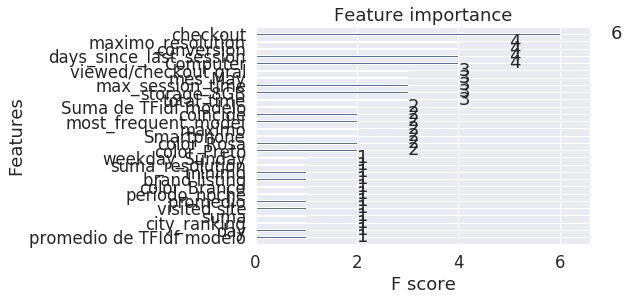

In [24]:
xgb.plot_importance(final_gb) # fixear

In [25]:
importances = final_gb.get_fscore()
importances

{'checkout': 6,
 'total_time': 3,
 'Computer': 4,
 'promedio de TFIdf modelo': 1,
 'days_since_last_session': 4,
 'day': 1,
 'conversion': 4,
 'color_Preto': 2,
 'color_Rosa': 2,
 'storage_8GB': 3,
 'max_session_time': 3,
 'Smartphone': 2,
 'maximo': 2,
 'city_ranking': 1,
 'suma': 1,
 'maximo_resolution': 4,
 'most_frequent_model': 2,
 'visited site': 1,
 'mes_May': 3,
 'viewed/checkout gral': 3,
 'promedio': 1,
 'coincide': 2,
 'periodo_noche': 1,
 'color_Branco': 1,
 'Suma de TFidf modelo': 2,
 'brand listing': 1,
 'minimo': 1,
 'suma_resolution': 1,
 'weekday_Sunday': 1}

In [26]:
#######

In [27]:
################### FALTA SEPARAR EN TEST Y TRAIN PARA HACER ESTO

In [28]:
#testdmat = xgb.DMatrix(x_test)

In [29]:
#from sklearn.metrics import accuracy_score
#y_pred = final_gb.predict(testdmat) # Predict using our testdmat
#y_pred

In [30]:
#y_pred[y_pred > 0.5] = 1
#y_pred[y_pred <= 0.5] = 0
#y_pred

In [31]:
#accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

In [32]:
###########

In [33]:
set_test = labels_predict
personas = set_test["person"]
set_test = set_test.drop(columns=['person'])
set_test = set_test.fillna(0)

final_test = set_test
testdmat = xgb.DMatrix(final_test)

In [34]:
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.246012  , 0.26961887, 0.23066066, ..., 0.2054156 , 0.2054156 ,
       0.2054156 ], dtype=float32)

In [35]:
predicts_kaggel = y_pred.tolist()


In [36]:
df_kaggel = pd.DataFrame(predicts_kaggel)
df_kaggel.head()

,0
0,0.246012
1,0.269619
2,0.230661
3,0.234261
4,0.208711


In [37]:
df_kaggel["person"] = personas
df_kaggel.rename(columns = {0: 'label'},inplace = True) 

In [38]:
df_kaggel = df_kaggel[['person','label']]

In [39]:
df_kaggel.to_csv('Resultados_new_xgb.csv',index=False)